# Install and Import

In [138]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import re
import PyPDF2
import glob
from matplotlib import pyplot as plt
import os
from collections import Counter

# Dataset

## Class

In [204]:
class PDFDataset():
  '''
  By using PDFDataset we can read all PDF files in pdf_dir and return each page content and the total number of pages in the PDF file.
  :param pdf_dir: the name of directory that includes PDF files
  :type post_limit_no: str

  :ivar pdf_dir: store the name of directory that includes PDF files
  :vartype pdf_dir: str
  :ivar ground_truth: include each pdf file's name and the page number of TOC
  :vartype ground_truth: dict
  :ivar gt_page_content_dict: fill with each pdf page's content and the total number of pages in the PDF file after calling read_ground_truth_pages function.
  :vartype gt_page_content_dict: dict
  '''

  def __init__(self, dir_path):

    self.pdf_dir= dir_path
    self.ground_truth= {"abcam_2013.pdf":3, "ABERDEEN_2015.pdf":5
      , "access intelligence plc  report and accounts 2015.pdf": 2
      , "afren plc  report and accounts 2007.pdf": 2
      , "alexandra plc  report and accounts 2004.pdf": 2
      , "allocate software plc  report and accounts 2012.pdf":2
      , "GOTTEX FUND MANAGEMENT HOLDINGS LTD  REPORT AND ACCOUNTS 2008.pdf": 2
      , "HELICAL BAR PLC  REPORT AND ACCOUNTS 2016.pdf": 2
      , "HSBC HOLDINGS PLC  REPORT AND ACCOUNTS 2014  CHINESE TEXT.pdf": 2
      , "LLOYDS BANKING GROUP PLC  REPORT AND ACCOUNTS 2012.pdf": 2
      , "MITON GROUP PLC  REPORT AND ACCOUNTS 2013.pdf": 3
      , "ocado group plc  report and accounts 2015.pdf": 5
      , "RANDGOLD RESOURCES LTD  REPORT AND ACCOUNTS 2015  FRENCH TEXT.pdf": 6}


  def read_pdf_range(self, file_name, end_page, start_page= 0):
    '''this function returns list of pages content of the given file from start_page to the end_page (zero-indexed)
    and the total number of pages in the PDF file

    :param file_name: the name of target file in the pdf_dir directory
    :type file_name: str
    :param  end_page: the final page to read content (the content of end_page is not returned)
    :type end_page: int
    :param  start_page: the start page to read content (the content of start_page is returned)
    :type start_page: int        

    :returns: a tuple that includes each page content from start page to the end page and the total number of pages in the PDF file
    :rtype: tuple
    '''

    # read the file
    pdfFileObj = open(self.pdf_dir+file_name, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    
    pages_content= []
    for index in range(start_page, end_page):
      pageObj = pdfReader.getPage(index)
      pages_content.append(pageObj.extractText())
    
    return pages_content, pdfReader.numPages
          

  def read_pdf_page(self, file_path, page_no):
    '''this function returns content of a specific page of the given file and the total number of pages in the PDF file

    :param file_name: the name of target file in the pdf_dir directory
    :type file_name: str
    :param  page_no: the page number to read its content (zero-indexed)
    :type page_no: int

    :returns: a tuple that includes the target page content of the given file and the total number of pages in the PDF file
    :rtype: tuple
    '''

    page_content, numPages= self.read_pdf_range(file_path, page_no, start_page= page_no-1)
    return page_content[0], numPages            


  def read_ground_truth_pages(self, first_pages_no):
    '''this function returns content of all ground truth files and their total number of pages

    :param file_name: the number of first pages to read (zero-indexed) ex: 15 means to read the first 15 pages (0-14)
    :type file_name: int

    :returns: a dictionary (key= name of pdf files) that includes another dictionary that consists of the content of all ground truth files (key= pages_content) 
    and their total number of pages (key= num_pages)
    :rtype: dict
    '''

    self.gt_page_content_dict = dict()
    for pdf_name, pdf_toc_page_no in pdf_dataset.ground_truth.items():
      pages_content, num_pages= self.read_pdf_range(pdf_name ,first_pages_no)
      self.gt_page_content_dict[pdf_name]= {"pages_content":pages_content, "num_pages": num_pages}

    return self.gt_page_content_dict

## Read Dataset

In [297]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
# directory of ground truth pdf files
pdf_dir= '/content/drive/MyDrive/Apply/University/Lancaster/pdfs/'
# create an object of PDFDataset class 
pdf_dataset= PDFDataset(pdf_dir)

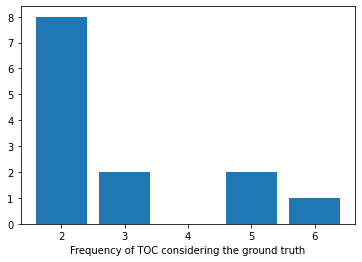

In [299]:
# Count each TOC page number of ground truth to plot bar chart
gt_chart_data= Counter(pdf_dataset.ground_truth.values())
plt.bar(gt_chart_data.keys(), gt_chart_data.values())
plt.xlabel("Frequency of TOC considering the ground truth")
plt.show()

In [300]:
# read the content of 15 first pages of the ground truth pdf files 
gt_page_content_dict= pdf_dataset.read_ground_truth_pages(first_pages_no= 15)

In [301]:
# get content of the TOC page from 'abcam_2013.pdf' file to check the function
test_file_name= "abcam_2013.pdf"
print(pdf_dataset.gt_page_content_dict[test_file_name]["num_pages"])
print(len(pdf_dataset.gt_page_content_dict[test_file_name]["pages_content"]))
pdf_dataset.gt_page_content_dict[test_file_name]["pages_content"][pdf_dataset.ground_truth[test_file_name]-1]

96
15


"With our 2013 Annual Report \nwe\xa0celebrate 15 years of Abcam’s continual drive\xa0for\xa0discovery\nAbcam’s success over the past 15 years \nreflects the strength of our vision to become the leading supplier of life science research tools. Our people and our drive to succeed support our mission of enabling scientists to\xa0discover more. Our global team always \nstrives to offer the best products and services \nto our customers. \nWith three acquisitions over the previous \ntwo\xa0years, Abcam has worked hard on M&A integration as well as delivering business as\xa0usual. This ensures our customers benefit from both existing and new product additions as\xa0well as\xa0extended capabilities and service\xa0offerings.\nDespite continued pressure on research \nbudgets, Abcam has continued to produce \nstrong growth. I am excited about the future \nand\xa0what Abcam can achieve.\nMike Redmond\nChairmanOverview\n 2 Abcam in brief \n 4 Our business\n 6 Our people\n 8 Our history\n 10 Chairm

# Models

## Class

In [302]:
class TOCModels():
  '''
  By using TOCModels class we can experiment with different methods to find the TOC page number.
  :param ground_truth: A dictionary that includes each ground truth pdf file's name and the page number of TOC
  :type ground_truth: dict

  :ivar month_names: Name of months in English to use in different patterns
  :vartype month_names: list
  :ivar date_pattern: The first pattern  to find dates in page's content (ex: Jan/January 15)
  :vartype date_pattern: str
  :ivar date_pattern2: The first pattern  to find dates in page's content (ex: 15 Jan/January)
  :vartype date_pattern2: str
  :ivar pattern_month_name: Pattern to find month's name in page's content
  :vartype pattern_month_name: str
  '''

  def __init__(self, ground_truth):
    self.month_names= ["Jan", "January", "Feb", "February", "Mar", "March",
              "Apr", "April", "May", "June", "July", "Aug", "August", "Sep", "September",
              "Oct" ,"October","Nov", "November", "Dec", "December"]
    self.date_pattern= r"\bmonth_name\b\s*[^\d]?\d{2}[^\d]{1}"
    self.date_pattern2= r"[^\d]{1}\d{2}\s*[^\d]?\bmonth_name\b"
    self.ground_truth= ground_truth

    self.pattern_month_name= r"\bJan\b"
    for month in self.month_names[1:]:
      self.pattern_month_name += r"|\b" + month + r"\b"


  def find_toc_majority(self, print_acc= False):
    ''' Get the TOC page number using majority vote

    :param print_acc: If true, prints the prediction accuracy of all ground truth pdf files TOC page number
    :type print_acc: bool

    :returns: returns the suggested TOC page number
    :rtype: int
    '''

    # count TOC page number of ground truth files
    toc_counter= Counter(self.ground_truth.values())

    # consider the most repeated page number of TOC in ground truth as prediction
    toc_predicted= max(toc_counter, key= toc_counter.get)
    if print_acc:
      self.__calculate_accuracy([toc_predicted]*len(self.ground_truth))

    return toc_predicted


  def find_toc_rule_based(self, page_content_dict, min_index_no, max_page_to_find, print_acc= False
                          , considering_special_words= False, special_words= ["Contents"]):
    '''this function returns list of pages content of the given file from start_page to the end_page (zero-indexed)
    and the total number of pages in the PDF file

    :param page_content_dict: a dictionary (key= name of pdf files) that includes another dictionary that consists of the content of all ground truth files (key= pages_content) 
    and their total number of pages (key= num_pages)
    :type page_content_dict: dict
    :param  min_index_no: minimun number of index should exists in the TOC page
    :type min_index_no: int
    :param  max_page_to_find: max page number to explore for TOC
    :type max_page_to_find: int
    :param print_acc: If true, prints the prediction accuracy of all ground truth pdf files TOC page number
    :type print_acc: bool    
    :param considering_special_words: Consider weather some special words to reorder the candidate pages for being TOC
    :type max_page_to_find: bool
    :param  special_words: some special words to reorder the candidate pages for being TOC
    :type special_words: list

    :returns: candidate pages for being TOC of each pdf file that exists in page_content_dict
    :rtype: dict
    '''

    # {"pages_content":pages_content, "num_pages": num_pages}

    candidates_page= dict()
    prediction= []

    for pdf_name, content in page_content_dict.items():
      candidates_page[pdf_name]=[]
      
      for page_idx in range(max_page_to_find):
        if self.__is_toc(content["pages_content"][page_idx], content["num_pages"], min_index_no):
          if considering_special_words and any(word in content["pages_content"][page_idx] for word in special_words):
            candidates_page[pdf_name].insert(0, page_idx + 1)
          else:
            candidates_page[pdf_name].append(page_idx + 1)

      if len(candidates_page[pdf_name])==0:
        candidates_page[pdf_name].append(self.find_toc_majority())
      
      prediction.append(candidates_page[pdf_name][0])
          
    if print_acc:
      self.__calculate_accuracy(prediction)

    return candidates_page


  def __is_toc(self, page_content, num_pages, min_index_no):
    '''this function a page is TOC or not by using some rules

    :param page_content: the content of target page
    :type page_content: str
    :param num_pages: the total number of pages in the PDF file
    :type num_pages: int
    :param  min_index_no: minimun number of index should exists in the TOC page
    :type min_index_no: int

    :returns: return True (the page is probably TOC) or False
    :rtype: boor
    '''

    # if month names are repeated more than 10 times, it's not TOC
    months_name_no_in_page= len(re.findall(self.pattern_month_name, page_content))
    if months_name_no_in_page> 10:
      return False
    
    # if month names are repeated more than 10 times, it's not TOC
    for month in self.month_names:
      months_name_no_in_page+= len(re.findall(self.date_pattern.replace("month_name", month), page_content))
      months_name_no_in_page+= len(re.findall(self.date_pattern2.replace("month_name", month), page_content))
    
    if months_name_no_in_page> 10:
      return False

    # remove digits plus two characters like '1st', '2nd', '10th', '22nd'
    page_content= re.sub("\d+(?:st|nd|rd|th)(\s)+", "", page_content)
    
    # find dates like Jan 10 or 10 Jan and remove them from page content
    for month in self.month_names:
      page_content= re.sub(self.date_pattern.replace("month_name", month), " ", page_content)
      page_content= re.sub(self.date_pattern2.replace("month_name", month), " ", page_content)

    # in some occosions, when read TOC page from a PDF file, page number has no space with the next or previous token.
    # if thses numbers are in range 1 to the total page number of the pdf file, we should consider these numbers too. 

    # find all tokens which start with a number and tokens do not include any punctuation
    tokens_start_with_num= re.findall(r"\s+\d+[a-zA-Z’']+\s+", page_content)
    tokens_start_with_num= [num for num in re.findall(r'\d+', ' '.join(tokens_start_with_num)) if int(num)>= 1 and int(num)<= num_pages]

    # find all tokens which end with a number and tokens do not include any punctuation
    tokens_end_with_num= re.findall(r"\s+[a-zA-Z’']+\d+\s+", page_content)
    tokens_end_with_num= [num for num in re.findall(r'\d+', ' '.join(tokens_end_with_num)) if int(num)>= 1 and int(num)<= num_pages]

    all_nums_lst= [int(word) for word in page_content.split() if word.isdigit() and int(word)<= num_pages]

    if len(all_nums_lst) + len(tokens_start_with_num)+ len(tokens_end_with_num) < min_index_no:
      return False

    return True


  def __calculate_accuracy(self, prediction_list):
    '''this function calculates accuracy of the prediction considering the self.ground_truth

    :param prediction_list: the list of prediction of TOC page number
    :type prediction_list: list  

    :returns: returns the accuracy
    :rtype: float
    '''    
    accuracy= 0
    for y,pred_y in zip(self.ground_truth.values(),prediction_list):
      if pred_y==y:
        accuracy+= 1
    
    accuracy /= len(prediction_list)
    print("prediction accuracy is: ", accuracy)
    print()
    return accuracy


## Experiments

In [290]:
# create an object of TOCModels class 
toc_finder= TOCModels(pdf_dataset.ground_truth)

### Majority Vote

In [291]:
# predict TOC page number using majority vote
toc_page_no= toc_finder.find_toc_majority(print_acc= True)

print("The page number of TOC in all PDF is: ", toc_page_no)

prediction accuracy is:  0.6153846153846154

The page number of TOC in all PDF is:  2


### My Heuristic Rule-Based Model

In [292]:
# by exploring all (13) pdf files I set min_index_number = 15
# predict TOC page number using rule based model without using special words
rule_based_result= toc_finder.find_toc_rule_based(page_content_dict= pdf_dataset.gt_page_content_dict
                               , min_index_no= 15, max_page_to_find= 15, print_acc= True)

prediction accuracy is:  0.9230769230769231



In [293]:
# print each file's candidat page for TOC
rule_based_result

{'abcam_2013.pdf': [3],
 'ABERDEEN_2015.pdf': [5],
 'access intelligence plc  report and accounts 2015.pdf': [2],
 'afren plc  report and accounts 2007.pdf': [2, 8, 9],
 'alexandra plc  report and accounts 2004.pdf': [2],
 'allocate software plc  report and accounts 2012.pdf': [2, 3, 5],
 'GOTTEX FUND MANAGEMENT HOLDINGS LTD  REPORT AND ACCOUNTS 2008.pdf': [2],
 'HELICAL BAR PLC  REPORT AND ACCOUNTS 2016.pdf': [2],
 'HSBC HOLDINGS PLC  REPORT AND ACCOUNTS 2014  CHINESE TEXT.pdf': [2],
 'LLOYDS BANKING GROUP PLC  REPORT AND ACCOUNTS 2012.pdf': [2,
  4,
  5,
  7,
  9,
  11,
  13,
  15],
 'MITON GROUP PLC  REPORT AND ACCOUNTS 2013.pdf': [3],
 'ocado group plc  report and accounts 2015.pdf': [3, 5, 13],
 'RANDGOLD RESOURCES LTD  REPORT AND ACCOUNTS 2015  FRENCH TEXT.pdf': [6,
  8,
  9,
  14]}

In [295]:
# predict TOC page number using rule based model with using special words
rule_based_result_special_words= toc_finder.find_toc_rule_based(page_content_dict= pdf_dataset.gt_page_content_dict
                               , min_index_no= 15, max_page_to_find= 15, print_acc= True
                               , considering_special_words= True, special_words= ["Contents"])

prediction accuracy is:  1.0



In [296]:
# print each file's candidat page for TOC
rule_based_result_special_words

{'abcam_2013.pdf': [3],
 'ABERDEEN_2015.pdf': [5],
 'access intelligence plc  report and accounts 2015.pdf': [2],
 'afren plc  report and accounts 2007.pdf': [2, 8, 9],
 'alexandra plc  report and accounts 2004.pdf': [2],
 'allocate software plc  report and accounts 2012.pdf': [2, 3, 5],
 'GOTTEX FUND MANAGEMENT HOLDINGS LTD  REPORT AND ACCOUNTS 2008.pdf': [2],
 'HELICAL BAR PLC  REPORT AND ACCOUNTS 2016.pdf': [2],
 'HSBC HOLDINGS PLC  REPORT AND ACCOUNTS 2014  CHINESE TEXT.pdf': [2],
 'LLOYDS BANKING GROUP PLC  REPORT AND ACCOUNTS 2012.pdf': [2,
  4,
  5,
  7,
  9,
  11,
  13,
  15],
 'MITON GROUP PLC  REPORT AND ACCOUNTS 2013.pdf': [3],
 'ocado group plc  report and accounts 2015.pdf': [5, 3, 13],
 'RANDGOLD RESOURCES LTD  REPORT AND ACCOUNTS 2015  FRENCH TEXT.pdf': [6,
  8,
  9,
  14]}

## Explore Wrong Predictions

In [254]:
print(pdf_dataset.gt_page_content_dict["ABERDEEN_2015.pdf"]["pages_content"][13])

14 Aberdeen Asset Management PLC Annual Report and Accounts 2015
The market context
In this section
Key themes
• Market uncertainty
• The shift to solutions
• Changing clients and distribution needs• Technology 
• Digital communication
• Regulation
Market uncertainty
2015 was yet another year in which the market did not behave 
as many had forecast. This was supposed to be the year of a US interest rate rise, and lift-off for the US economy. Instead a tepid 
recovery has forced the US Federal Reserve to stay its hand. 
China’s slowdown has been telegraphed in collapsing commodity prices, which were welcomed at first, as they would lower producer costs. Now deflation may spread. Business confidence  
is falling everywhere. 
The reaction of equity markets says it all. Having spent the early 
part of the year consolidating gains, a broad sell-off since the summer tipped most markets into losses, only for a sharp bounce 
in October on hopes of more quantitative easing. In general, 
currenc

https://stackoverflow.com/questions/64700082/get-table-of-contents-from-a-pdf-with-python
